# MAD Statique <br>
### STAGE ANCHES <br>
Camille Urban <br>
22/03/2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from fonction_modelisation_MS import *

In [2]:
%matplotlib
%matplotlib

Using matplotlib backend: <object object at 0x0000021A7457E2F0>
Using matplotlib backend: TkAgg


# Illustration de la modélisation 

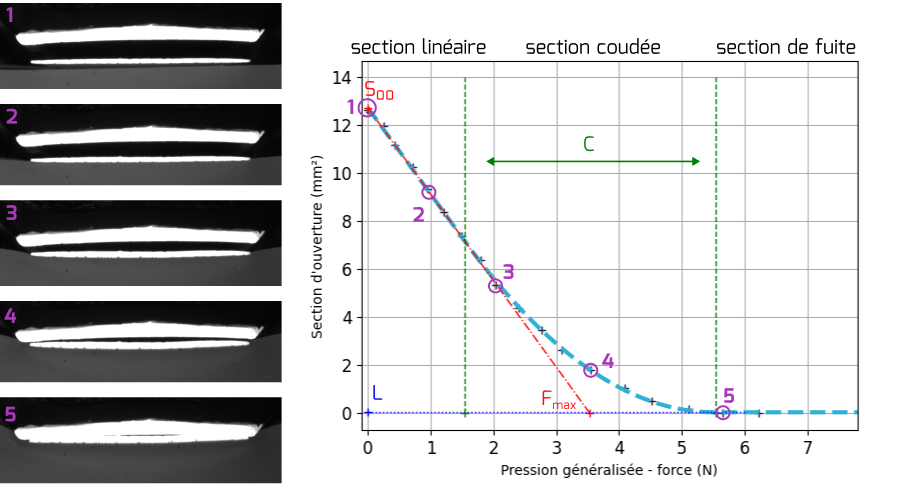

## Paramètres du Banc

In [3]:
# SENSIBILITE CAPTEUR
# S_force =  # mV/N
# G_force = 100
# S_force = 0.04026/100

# cannal d'acquisition
Cannal = 1

In [4]:
# Chargement data
dossier = 'mesures_2024.10.01'
nom_anche = '/anche'
nbr_anche = 90
seuil = 150

In [5]:
# plt.close('all')
# data = np.genfromtxt(dossier + '/Anche1.txt', delimiter=',')
# force = data[:,1]
# # print(force)
# # offset = min(force)
# # force = (force - offset)
# surf_canal = data[:,3]

# Paramopt = identification_modele(force, surf_canal, 'anche 1', c=['#2eb1d5', '#1d2343'], plot_figure=True)
# raideur = Paramopt[1]/Paramopt[0]
# surface = Paramopt[0]
# pression = Paramopt[1]
# coude = Paramopt[2]
# fuite = Paramopt[3]

# print(f'surface = {surface} mm²', f' \npression = {pression} N', f'\nraideur = {raideur} N/mm²', f'\ncoude = {coude} Pa', f'\nfuite = {fuite} mm²')


In [11]:
plt.close('all')


colors = [['#2eb1d5', '#1d2343'],  # bleu
          ['#60b44f', '#1a620c'],  #vert
          ['#e5442f', '#8b1506'],  # rouge
          ['#ff8c42', '#cc5803'],  # orange
          ['#8a2be2', '#5d3fd3']]  # Nuances de violet

# S_force = 0.04026/100
anche_per_graph = 5
for i in range(int(round(nbr_anche/anche_per_graph,1))):
    plt.figure()
    for j in range(anche_per_graph):
    # for j in ([2, 3, 4]):
        data = np.genfromtxt(dossier + f'/Anche{(i*anche_per_graph)+(j+1)}.txt', delimiter=',')
        force = data[:,1]
        surf_canal = data[:,3]  
        c = colors[j]
        Paramopt = identification_modele(force, surf_canal, f'anche {(i*anche_per_graph)+(j+1)}', c, plot_figure=True)
        raideur = Paramopt[1]/Paramopt[0]


In [7]:
plt.close('all')

In [8]:
# plt.close('all')
# from matplotlib import cm

# anche_per_graph = 8
# cmap = cm.get_cmap('viridis')
# colors = [cmap(i / (anche_per_graph * 2)) for i in range(anche_per_graph * 2)]
# color_data = colors[j * 2]          # Couleur pour les données expérimentales
# color_model = colors[j * 2 + 1]
# # MODIFIER LA FONCTION POUR DEMANDER UNE COLORMAP ET INCLUR LA D2FINITION DE COLORS DANS LA FONCTION

# for i in range(int(round(nbr_anche/anche_per_graph,1))):
#     plt.figure()
#     for j in range(anche_per_graph):
#     # for j in ([2, 3, 4]):
#         data = np.genfromtxt(dossier + f'/Anche{j+1}.txt', delimiter=',')
#         force = data[:,1]
#         surf_canal = data[:,3]
#         Paramopt = identification_modele(force, surf_canal, f'anche {(i*anche_per_graph)+(j+1)}', color_map, plot_figure=True)
#         raideur = Paramopt[1]/Paramopt[0]


In [9]:
plt.close('all')

In [12]:
with open(f'data_MS_90anches.txt', 'w') as file:
    file.write(f'numero_anche force_anche S00(mm**2) F_max(N) Raideur(N/mm**2) Coude Fuite \n')
    forces_anche = [3, 3.5, 2.5]
    
    for i in range (nbr_anche):
        if 0 <= i < 29:
            force = forces_anche[0]
        elif 29 <= i < 59 :
            force = forces_anche[1]
        elif 59 <= i < 89:
            force = forces_anche[2]
            
        data = np.genfromtxt(dossier + f'/Anche{i+1}.txt', delimiter=',')
        forces = data[:,1]
        surf_canal = data[:,3] 
        Paramopt = identification_modele(forces, surf_canal, f'anche {i+1}')
        Surface_00 = Paramopt[0]
        Force_max = Paramopt[1]
        Raideur = Paramopt[1]/Paramopt[0]
        Coude = Paramopt[2]
        Fuite = Paramopt[3]
        file.write(f'Anche_{i+1} {force} {Surface_00} {Force_max} {Raideur} {Coude} {Fuite} \n')
        # file.write(f'Anche_{i+1} {surface} {pression} {coude} {fuite} \n')